In [2]:
import sys
#!{sys.executable} -m pip install gymnasium[classic-control]

import gymnasium as gym
import matplotlib.pyplot as plt
import numpy as np
import random

In [3]:
env = gym.make("CartPole-v1", render_mode = "human")
print(env.action_space)
print(env.observation_space)
print(env.action_space.sample())

Discrete(2)
Box([-4.8000002e+00 -3.4028235e+38 -4.1887903e-01 -3.4028235e+38], [4.8000002e+00 3.4028235e+38 4.1887903e-01 3.4028235e+38], (4,), float32)
1


In [4]:
env = gym.make("CartPole-v1", render_mode = "human")
observation, info = env.reset()

for _ in range(100):
    action = env.action_space.sample()  # agent policy that uses the observation and info
    observation, reward, terminated, truncated, info = env.step(action)

    if terminated or truncated:
        observation, info = env.reset()

env.close()

In [5]:
env = gym.make("CartPole-v1", render_mode = "human")
observation, info = env.reset()

for _ in range(100):
    action = env.action_space.sample()  # agent policy that uses the observation and info
    observation, reward, terminated, truncated, info = env.step(action)
    print(f"{observation} -> {reward}")

    if terminated or truncated:
        observation, info = env.reset()

env.close()

[-0.03393114 -0.17533946  0.00470653  0.26702544] -> 1.0
[-0.03743792  0.01971501  0.01004704 -0.0241693 ] -> 1.0
[-0.03704362 -0.17554957  0.00956365  0.2716666 ] -> 1.0
[-0.04055462  0.01943462  0.01499699 -0.01798466] -> 1.0
[-0.04016592  0.21433832  0.01463729 -0.3058984 ] -> 1.0
[-0.03587916  0.01901087  0.00851933 -0.0086354 ] -> 1.0
[-0.03549894 -0.17623222  0.00834662  0.28672326] -> 1.0
[-0.03902358  0.01876972  0.01408108 -0.00331557] -> 1.0
[-0.03864819  0.21368693  0.01401477 -0.2915227 ] -> 1.0
[-0.03437445  0.40860626  0.00818432 -0.5797528 ] -> 1.0
[-0.02620232  0.6036126  -0.00341074 -0.8698463 ] -> 1.0
[-0.01413007  0.79878074 -0.02080766 -1.1635996 ] -> 1.0
[ 0.00184554  0.9941674  -0.04407966 -1.4627331 ] -> 1.0
[ 0.02172889  1.1898009  -0.07333432 -1.7688535 ] -> 1.0
[ 0.04552491  1.3856702  -0.10871139 -2.0834088 ] -> 1.0
[ 0.07323831  1.5817107  -0.15037957 -2.4076319 ] -> 1.0
[ 0.10487252  1.7777877  -0.19853221 -2.7424731 ] -> 1.0
[ 0.14042827  1.9736779  -0.253

In [6]:
print(env.observation_space.low)
print(env.observation_space.high)

[-4.8000002e+00 -3.4028235e+38 -4.1887903e-01 -3.4028235e+38]
[4.8000002e+00 3.4028235e+38 4.1887903e-01 3.4028235e+38]


In [7]:
def discretize(x):
    return tuple((x/np.array([0.25, 0.25, 0.01, 0.1])).astype(int))

In [8]:
def create_bins(i,num):
    return np.arange(num+1)*(i[1]-i[0])/num+i[0]

print("Sample bins for interval (-5,5) with 10 bins\n",create_bins((-5,5),10))

ints = [(-5,5),(-2,2),(-0.5,0.5),(-2,2)] # intervals of values for each parameter
nbins = [20,20,10,10] # number of bins for each parameter
bins = [create_bins(ints[i],nbins[i]) for i in range(4)]

def discretize_bins(x):
    return tuple(np.digitize(x[i],bins[i]) for i in range(4)

SyntaxError: unexpected EOF while parsing (<ipython-input-8-b341b4a36e41>, line 11)

In [9]:
env = gym.make("CartPole-v1", render_mode = "human")
observation, info = env.reset()

for _ in range(100):
    action = env.action_space.sample()  # agent policy that uses the observation and info
    observation, reward, terminated, truncated, info = env.step(action)
    print(discretize(observation))

    if terminated or truncated:
        observation, info = env.reset()

env.close()

(0, 0, -1, 2)
(0, -1, 0, 5)
(0, -2, 0, 8)
(0, -2, 2, 11)
(0, -3, 4, 14)
(0, -4, 7, 17)
(0, -5, 10, 20)
(0, -6, 14, 23)
(0, -6, 19, 27)
(0, -7, 25, 30)
(0, 0, -2, 2)
(0, -1, -2, 5)
(0, 0, 0, 2)
(0, -1, 0, 5)
(0, -2, 0, 8)
(0, -3, 2, 11)
(0, -3, 4, 14)
(0, -3, 7, 11)
(0, -2, 9, 8)
(0, -3, 11, 11)
(0, -2, 13, 9)
(0, -1, 15, 6)
(0, 0, 17, 4)
(0, -1, 18, 7)
(0, -2, 19, 11)
(0, -1, 21, 9)
(0, 0, -3, 2)
(0, 0, -2, 0)
(0, 0, -2, -3)
(0, 0, -3, 0)
(0, 0, -3, -3)
(0, 1, -3, -6)
(0, 0, -5, -3)
(0, 0, -5, 0)
(0, 0, -6, -4)
(0, 1, -6, -7)
(0, 0, -8, -4)
(0, 1, -9, -7)
(0, 2, -10, -10)
(0, 1, -12, -8)
(0, 0, -14, -5)
(0, 0, -15, -3)
(0, 0, -16, -6)
(0, 1, -17, -10)
(0, 0, -19, -7)
(0, 0, -21, -5)
(0, 0, -3, 3)
(0, -1, -2, 5)
(0, 0, -1, 2)
(0, -1, -1, 5)
(0, -2, 0, 8)
(0, -3, 1, 11)
(0, -3, 4, 14)
(0, -4, 7, 17)
(0, -3, 10, 14)
(0, -3, 13, 12)
(0, -2, 16, 9)
(0, -3, 18, 13)
(0, -3, 20, 16)
(0, -3, 24, 14)
(0, 0, 0, 2)
(0, -1, 0, 5)
(0, 0, 2, 3)
(0, 0, 2, 0)
(0, 0, 2, -2)
(0, 1, 2, -5)
(0, 2, 1, -8)
(

In [10]:
Q = {}
actions = (0,1)

def qvalues(state):
    return [Q.get((state,a),0) for a in actions]

In [11]:
# hyperparameters
alpha = 0.3
gamma = 0.9
epsilon = 0.90

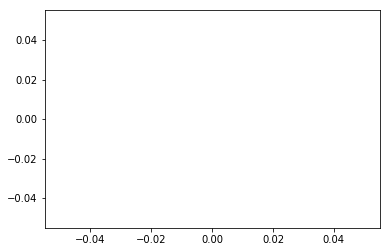

In [13]:
plt.plot(rewards)

In [15]:
env = gym.make("CartPole-v1", render_mode = "human")
observation, info = env.reset()
for i in range(1000):
    s = discretize(observation)
    v = probs(np.array(qvalues(s)))
    a = random.choices(actions,weights=v)[0]
    observation, reward, terminated, truncated, info = env.step(a)
    if terminated or truncated:
        observation, info = env.reset()
env.close()

In [ ]:
env = gym.make("LunarLander-v2", render_mode="human")
observation, info = env.reset()

for _ in range(1000):
    action = env.action_space.sample()  # agent policy that uses the observation and info
    observation, reward, terminated, truncated, info = env.step(action)

    if terminated or truncated:
        observation, info = env.reset()

env.close()

In [19]:
env = gym.make("CartPole-v1", render_mode="human")
observation, info = env.reset()

for _ in range(1000):
    action = env.action_space.sample()  # agent policy that uses the observation and info
    observation, reward, terminated, truncated, info = env.step(action)
    print(f"{observation} -> {reward}")

    if terminated or truncated:
        observation, info = env.reset()

env.close()

[-0.03112888 -0.15968326  0.04458338  0.35158446] -> 1.0
[-0.03432255 -0.35540992  0.05161507  0.6579859 ] -> 1.0
[-0.04143075 -0.16104296  0.06477479  0.38199183] -> 1.0
[-0.04465161  0.03310231  0.07241463  0.11041513] -> 1.0
[-0.04398956  0.22711591  0.07462293 -0.15857126] -> 1.0
[-0.03944724  0.42109457  0.07145151 -0.42681068] -> 1.0
[-0.03102535  0.6151356   0.0629153  -0.6961407 ] -> 1.0
[-0.01872264  0.41920015  0.04899248 -0.38433412] -> 1.0
[-0.01033864  0.6135935   0.0413058  -0.6611763 ] -> 1.0
[ 0.00193323  0.8081171   0.02808227 -0.9405723 ] -> 1.0
[ 0.01809558  1.0028496   0.00927082 -1.2243007 ] -> 1.0
[ 0.03815257  0.80760944 -0.01521519 -0.9287275 ] -> 1.0
[ 0.05430476  1.0029334  -0.03378974 -1.2261528 ] -> 1.0
[ 0.07436343  1.1984737  -0.0583128  -1.5292281 ] -> 1.0
[ 0.0983329   1.0041015  -0.08889735 -1.2552996 ] -> 1.0
[ 0.11841493  1.200242   -0.11400335 -1.57445   ] -> 1.0
[ 0.14241977  1.396524   -0.14549235 -1.900406  ] -> 1.0
[ 0.17035025  1.5928903  -0.183